In [20]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [21]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
data = pd.read_csv('data_p.csv', encoding="ISO-8859-1")
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')
test = pd.read_csv('test.csv')

In [22]:

def convert_tv(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('TV' in amenities):
        return 1
    else:
        return 0
def convert_ac(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Air conditioning' in amenities):
        return 1
    else:
        return 0

def convert_kitchen(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Kitchen' in amenities):
        return 1
    else:
        return 0
    
def convert_wifi(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Wifi' in amenities):
        return 1
    else:
        return 0
def convert_heating(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Heating' in amenities):
        return 1
    else:
        return 0
def convert_frige(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Refrigerator' in amenities):
        return 1
    else:
        return 0
    
def convert_pool(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Pool' in amenities):
        return 1
    else:
        return 0
    
def convert_washer(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Washer' in amenities):
        return 1
    else:
        return 0
def convert_hottub(s):
    amenities =s.strip('{}').split(',')
    amenities=set(amenity.strip('"') for amenity in amenities)
    if ('Hot tub' in amenities):
        return 1
    else:
        return 0
data['TV'] = data['amenities'] .apply(convert_tv)
data['AC'] = data['amenities'] .apply(convert_ac)
data['Kitchen'] = data['amenities'] .apply(convert_kitchen)
data['Wifi'] = data['amenities'] .apply(convert_wifi)
data['Heating'] = data['amenities'] .apply(convert_heating)
data['Refrigerator'] = data['amenities'] .apply(convert_frige)
data['Pool'] = data['amenities'] .apply(convert_pool)
data['Washer'] = data['amenities'] .apply(convert_washer)
data['HotTub'] = data['amenities'] .apply(convert_hottub)

In [23]:
data_train=data[data.id.isin(train.id)]
data_train=data_train.drop(columns=['zipcode','first_review','last_review','amenities','latitude','longitude','id'])
y_train=data_train.price
x_train=data_train.drop(columns=['price'])


data_val=data[data.id.isin(val.id)]
y_val=data_val.price
x_val=data_val.drop(columns=['price','zipcode','first_review','last_review','amenities','latitude','longitude','id'])

data_test=data[data.id.isin(test.id)]
y_test=data_test.price
x_test=data_test.drop(columns=['price','zipcode','first_review','last_review','amenities','latitude','longitude','id'])



In [24]:
train_stats = x_train.describe().transpose()
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
x_train = norm(x_train)
x_val = norm(x_val)
x_test = norm(x_test)

In [25]:
pd.set_option('display.max_columns', None)
x_train


,host_since,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,square_feet,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,property_type_Aparthotel,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Campsite,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_Loft,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,TV,AC,Kitchen,Wifi,Heating,Refrigerator,Pool,Washer,HotTub
3,-2.574943,0.217503,-1.336391,-0.171296,-1.015316,-0.469680,-0.813962,-0.624563,-0.582244,-0.663668,0.006284,3.659276,0.173679,0.290081,0.365790,0.520561,0.266347,0.278259,0.441467,0.565066,-0.104923,-0.226398,-0.300309,0.407441,-0.018032,-0.595575,-0.012749,-0.057106,-0.025505,-0.036081,-0.171599,-0.012749,-0.052636,-0.091422,-0.028518,-0.012749,-0.309857,-0.076715,-0.012749,-0.033748,-0.172101,-0.222805,-0.058521,-0.025505,1.132492,-0.018032,-0.012749,-0.111831,-0.062576,-0.04232,-0.111831,-0.036081,-0.068815,-0.025505,-0.201467,-0.012749,-0.040347,-0.018032,-1.569574,-0.094095,1.681604,-0.138008,-0.068815,-0.031242,-0.072304,-0.047755,0.115499,0.446305,0.128533,0.282919,0.177531,0.221193,-0.881700,-0.634239,-2.002279,-0.250756
4,-2.574943,0.217503,-1.336391,-0.171296,0.984755,-0.469680,-0.813962,-0.624563,0.019455,-0.663668,-5.444186,1.138175,0.510890,0.459937,0.365790,0.520561,0.266347,0.278259,0.441467,0.565066,-0.104923,-0.226398,-0.300309,0.407441,-0.018032,-0.595575,-0.012749,-0.057106,-0.025505,-0.036081,-0.171599,-0.012749,-0.052636,-0.091422,-0.028518,-0.012749,-0.309857,-0.076715,-0.012749,-0.033748,-0.172101,4.487496,-0.058521,-0.025505,-0.882865,-0.018032,-0.012749,-0.111831,-0.062576,-0.04232,-0.111831,-0.036081,-0.068815,-0.025505,-0.201467,-0.012749,-0.040347,-0.018032,0.637012,-0.094095,-0.594574,-0.138008,-0.068815,-0.031242,-0.072304,-0.047755,0.115499,0.446305,0.128533,0.282919,0.177531,0.221193,-0.881700,-0.634239,-2.002279,-0.250756
6,-2.574943,0.217503,0.748162,-0.171296,0.984755,-0.469680,-0.813962,-0.624563,-0.582244,-0.663668,0.006284,0.248375,-0.500741,-0.729057,-1.313643,-0.845598,0.266347,0.278259,-1.641850,-0.954732,-0.104923,4.416276,-0.300309,-2.453946,-0.018032,-0.595575,-0.012749,-0.057106,-0.025505,-0.036081,-0.171599,-0.012749,-0.052636,-0.091422,-0.028518,-0.012749,-0.309857,-0.076715,-0.012749,-0.033748,5.809611,-0.222805,-0.058521,-0.025505,-0.882865,-0.018032,-0.012749,-0.111831,-0.062576,-0.04232,-0.111831,-0.036081,-0.068815,-0.025505,-0.201467,-0.012749,-0.040347,-0.018032,0.637012,-0.094095,-0.594574,-0.138008,-0.068815,-0.031242,-0.072304,-0.047755,0.115499,-2.240257,0.128533,0.282919,0.177531,0.221193,-0.881700,-0.634239,-2.002279,-0.250756
7,-2.574943,0.217503,0.748162,-0.171296,-1.015316,-0.469680,0.285539,0.923823,0.396312,0.989605,0.006284,0.264853,-0.259877,-0.389344,0.365790,0.520561,0.266347,0.278259,0.441467,-0.954732,-0.104923,-0.226398,3.329361,-2.453946,-0.018032,-0.595575,-0.012749,-0

In [26]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.05800846],
       [-0.22086215],
       [ 1.0394778 ],
       [ 0.24983227],
       [-0.8921112 ],
       [-0.64331025],
       [-0.73695076],
       [ 0.5764235 ],
       [ 0.5406185 ],
       [ 0.35825342]], dtype=float32)

In [27]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 20

history = model.fit(
  x_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
15,10036.782848,70.458023,10036.780273,10018.970245,74.532822,10018.970703,15
16,10009.142641,70.240051,10009.142578,9945.549923,74.052139,9945.550781,16
17,9969.538979,69.956177,9969.540039,10366.732093,76.281563,10366.730469,17
18,9929.022943,70.144226,9929.023438,10165.593519,75.109543,10165.593750,18
19,9903.960612,69.946030,9903.959961,9830.136756,73.281250,9830.136719,19


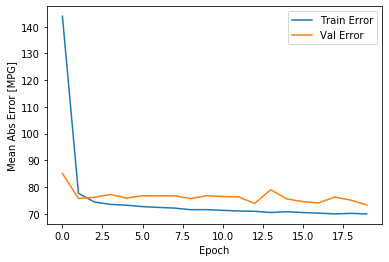

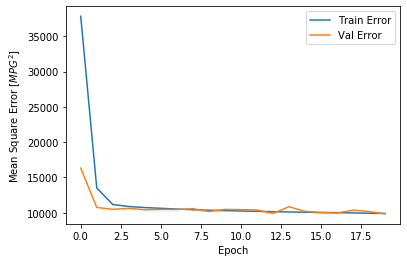

In [29]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')

  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')

  plt.legend()
  plt.show()


plot_history(history)

In [30]:
test_predictions = model.predict(x_test)
pd.DataFrame(test_predictions).to_csv("out.csv")